In [2]:
%load_ext rpy2.ipython
from IPython.display import HTML
HTML('''<script>
var code_show_err = false;
var code_toggle_err = function() {
    var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
    var stderr = Array.from(stderrNodes)
    if (code_show_err){
        stderr.forEach(ele => ele.style.display = 'block');
    } else {
        stderr.forEach(ele => ele.style.display = 'none');
    }
    code_show_err = !code_show_err
}
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')

In [2]:
%%R
library('pandoc')
library(ggplot2)
library(DESeq2)
library(apeglm)
library(ggrepel)
library(dplyr)
library(org.Mm.eg.db)
library(PCAtools)
library(GEOquery)
library(fgsea)
library(stringr)
library(Seurat)
library(patchwork)
library(Matrix)
library(MAST)
library(umap)
library(stringr)
library('FactoMineR')
library('ade4')
library('amap')

R[write to console]: Ошибка в library("pandoc") :нет пакета под названием ‘pandoc’

R[write to console]: Вдобавок: 
R[write to console]: Предупреждение:

R[write to console]: В (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  библиотеки ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ не содержат пакетов




Ошибка в library("pandoc") :нет пакета под названием ‘pandoc’


RInterpreterError: Failed to parse and evaluate line "library('pandoc')\nlibrary(ggplot2)\nlibrary(DESeq2)\nlibrary(apeglm)\nlibrary(ggrepel)\nlibrary(dplyr)\nlibrary(org.Mm.eg.db)\nlibrary(PCAtools)\nlibrary(GEOquery)\nlibrary(fgsea)\nlibrary(stringr)\nlibrary(Seurat)\nlibrary(patchwork)\nlibrary(Matrix)\nlibrary(MAST)\nlibrary(umap)\nlibrary(stringr)\nlibrary('FactoMineR')\nlibrary('ade4')\nlibrary('amap')\n".
R error message: 'Ошибка в library("pandoc") :нет пакета под названием ‘pandoc’'

# PCA

In [3]:
%%R
files<-list.files(path='Limma', pattern='.rda', full.names = TRUE)
load('GSE100067-GPL17021_split-Copy6.txt_1.rda')
df <- data.frame(result)
for (file in files) {  
    load(file)
    df <- cbind(df, result)
}
names(df) = df[1, ]
df_new = df[-c(1), ]
library(Hmisc) #work with missing values
df_imp <- impute(df_new, fun = 0) # replace missing values
df_num <- as.data.frame(apply(df_imp, 2, as.numeric))  # Convert all variable types to numeric
df = df_num
df$Means <-apply(df,1,mean)
df2 = df[order(df$Means, decreasing = TRUE),]
df2 = df2[1:10000,]
library("dplyr")
df3 <-subset(df2, select = -c(Means))
df_t = t(df3)
pca = prcomp(df_t, center = FALSE, scale = FALSE, na.action = na.omit)

R[write to console]: 
Присоединяю пакет: ‘Hmisc’


R[write to console]: Следующий объект скрыт от ‘package:MAST’:

    impute


R[write to console]: Следующий объект скрыт от ‘package:SeuratObject’:

    Key


R[write to console]: Следующий объект скрыт от ‘package:Seurat’:

    Key


R[write to console]: Следующий объект скрыт от ‘package:AnnotationDbi’:

    contents


R[write to console]: Следующие объекты скрыты от ‘package:dplyr’:

    src, summarize


R[write to console]: Следующий объект скрыт от ‘package:Biobase’:

    contents


R[write to console]: Следующие объекты скрыты от ‘package:base’:

    format.pval, units




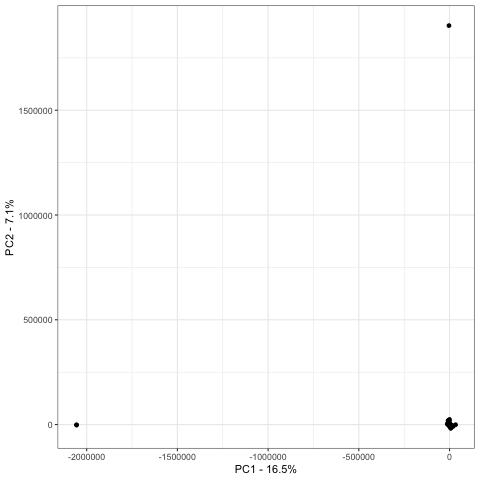

In [4]:
%%R
library(ggplot2)

#
X = pca$x[,1]
Y = pca$x[,2]
pca_data <- data.frame(Names = rownames(pca$x), + X, + Y)
pca_var <- pca$sdev^2
pca_var_per <- round(pca_var / sum(pca_var) * 100, 1)
# Plot
p <- ggplot(data = pca_data, aes(x = X, y = Y))
p <- p + geom_point()
p <- p + xlab(paste0("PC1 - ", pca_var_per[1], "%"))
p <- p + ylab(paste0("PC2 - ", pca_var_per[2], "%"))
p <- p + theme_bw()
print(p)

# UMAP

In [5]:
%%R
library(umap)
iris.umap = umap(pca$x, n_components = 2, random_state = 15) 
library(plotly) 
library(umap) 
layout <- iris.umap[["layout"]] 
layout <- data.frame(layout) 
final <- layout

fig <- plot_ly(final, x = ~X1, y = ~X2, type = 'scatter', mode = "markers") 
fig <- fig %>% layout(scene = list(xaxis = list(title = '0'), 
                                     yaxis = list(title = '1'))) 

R[write to console]: 
Присоединяю пакет: ‘plotly’


R[write to console]: Следующий объект скрыт от ‘package:Hmisc’:

    subplot


R[write to console]: Следующий объект скрыт от ‘package:AnnotationDbi’:

    select


R[write to console]: Следующий объект скрыт от ‘package:IRanges’:

    slice


R[write to console]: Следующий объект скрыт от ‘package:S4Vectors’:

    rename


R[write to console]: Следующий объект скрыт от ‘package:ggplot2’:

    last_plot


R[write to console]: Следующий объект скрыт от ‘package:stats’:

    filter


R[write to console]: Следующий объект скрыт от ‘package:graphics’:

    layout




# Coloring

In [6]:
pwd

'/Users/pavellebedev/Yandex.Disk.localized/Cloud_project/Project_2'

In [7]:
%%R
files<-list.files(path='split', pattern='.txt', full.names = FALSE)
df_con =  data.frame()
for (fileName in files) {   
    folder <- file.path("split")
    path = file.path(folder, fileName)
    skip_to_next <- FALSE
    tryCatch({ 
        split <-  read.table(path)
        for (i in 1:nrow(split)) {
            skip_to_next <- FALSE
            tryCatch({    # miss errors and continue, if samplew are not in exp
                con = split[7][i,]
                con2 = split[6][i,]
                if (xor(grepl('lps|LPS', con2) == TRUE, grepl('lps|LPS', con) == TRUE)){
                result = 'lps+'
                } else {
                result = 'lps-'
                }
                result = c(paste0(fileName, "`_", i), result)
                df_con = rbind(df_con, result)   
        }, error = function(e) { skip_to_next <<- TRUE})
        if(skip_to_next) { next }
            }
    }, error = function(e) { skip_to_next <<- TRUE})
    if(skip_to_next) { next }
    }


In [8]:
%%R
res = pca$x
df_con2 = df_con[df_con[,1] %in% rownames(layout),]
rownames(df_con2) = df_con2[,1]
layout = layout[rownames(layout) %in% df_con2[,1],]

In [9]:
%%R
pca = prcomp(df_t, center = FALSE, scale = FALSE, na.action = na.omit)

In [10]:
%%R
library(umap)
iris.umap = umap(pca$x, n_components = 2, random_state = 15) 

In [11]:
%%R
library(plotly) 
library(umap) 
layout <- iris.umap[["layout"]] 
layout <- data.frame(layout) 
final <-  merge(layout, df_con2,
                          by = 'row.names', all = TRUE) 
final$X.mac

NULL


In [12]:
%%R
fig <- plot_ly(final, x = ~X1, y = ~X2, color = final$X.lps., colors = c('red','blue')) 
fig <- fig %>% add_markers() 
fig <- fig %>% layout(scene = list(xaxis = list(title = '0'), 
                                     yaxis = list(title = '1'))) 

print(fig)

In [1]:
%%R
head(final)

UsageError: Cell magic `%%R` not found.


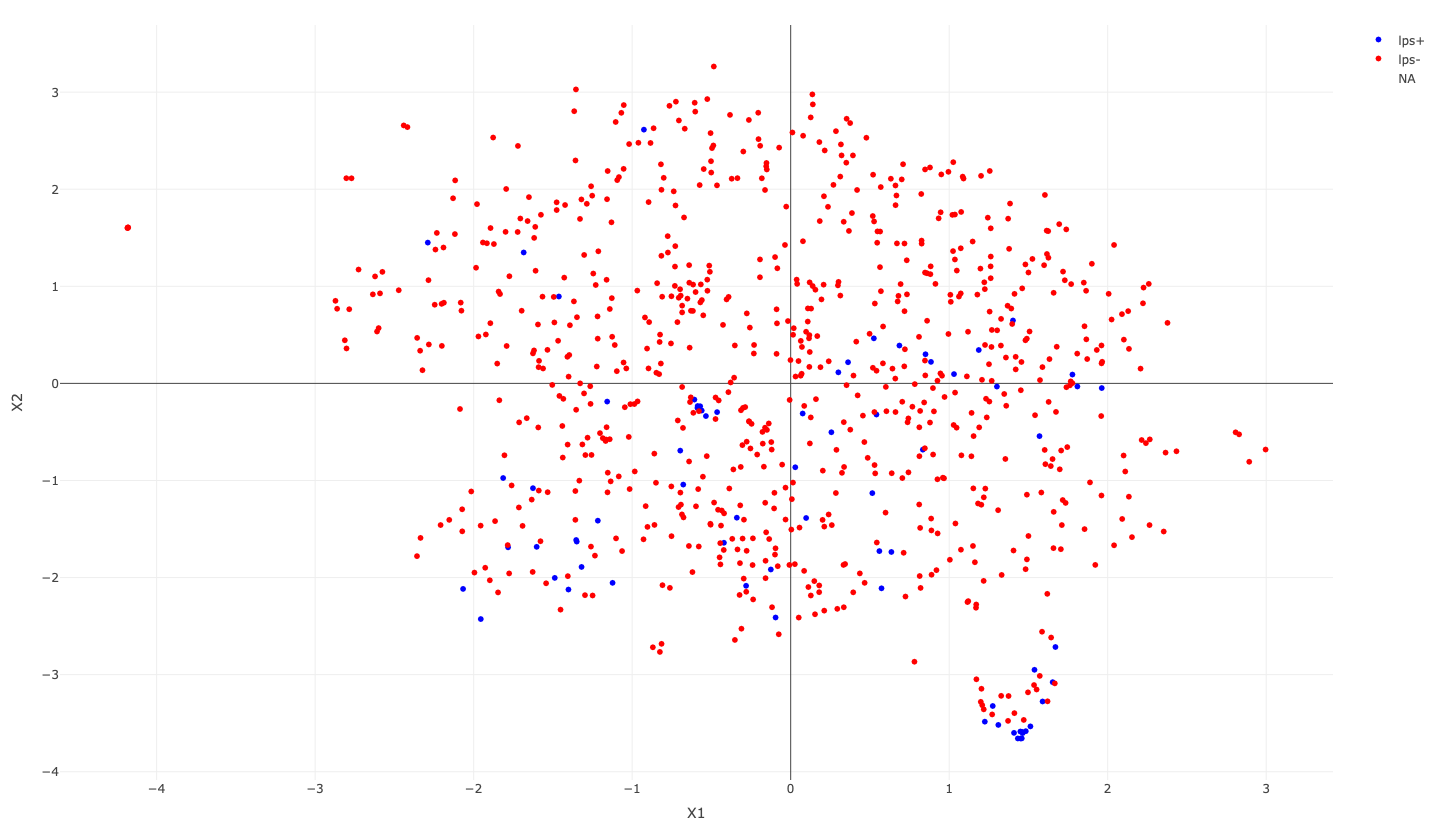

In [13]:
from PIL import Image
img = Image.open(r'newplot-7.png')
img

# Investigate  GSE162620

Bone marrow derived macrophages from C57BL6/J (WT), B6.129S2-Ifnar1tm1Agt/Mmjax (IFNAR KO), or B6(Cg)-Sting1tm1.2Camb/J (STING KO) Mus musculus were differentiated for 6 days in MCSF and then re-plated before infection. Some conditions were treated with IFNbeta for 4 hours before infection and the rest were untreated. Within each treatment group, the cells were either mock infected or infected with live or heat killed Mycobacterium tuberculosis strain H37Rv (MOI 10) for either 4 or 24 hours. All conditions were done in biological duplicate (i.e. BMDM from different mice) for a total of 72 samples.

In [18]:
%%R
files<-list.files(path='GSE162620_log', pattern='.rda', full.names = TRUE)
load('GSE162620-GPL24247_split-Copy1.txt_1.rda')
df <- data.frame(result)
for (file in files) {  
    load(file)
    df <- cbind(df, result)
}
names(df) = df[1, ]
df_new = df[-c(1), ]
library(Hmisc) #work with missing values
df_imp <- impute(df_new, fun = 0) # replace missing values
df_num <- as.data.frame(apply(df_imp, 2, as.numeric))  # Convert all variable types to numeric
df = df_num
df$Means <-apply(df,1,mean)
df2 = df[order(df$Means, decreasing = TRUE),]
df2 = df2[1:10000,]
library("dplyr")
df3 <-subset(df2, select = -c(Means))
df_t = t(df3)
pca = prcomp(df_t, center = FALSE, scale = FALSE, na.action = na.omit)

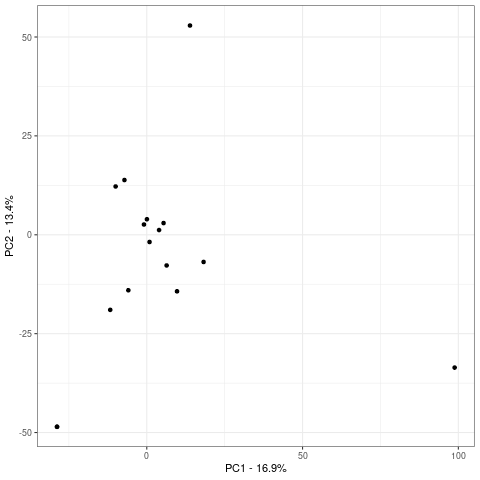

In [19]:
%%R
library(ggplot2)

#
X = pca$x[,1]
Y = pca$x[,2]
pca_data <- data.frame(Names = rownames(pca$x), + X, + Y)
pca_var <- pca$sdev^2
pca_var_per <- round(pca_var / sum(pca_var) * 100, 1)
# Plot
p <- ggplot(data = pca_data, aes(x = X, y = Y))
p <- p + geom_point()
p <- p + xlab(paste0("PC1 - ", pca_var_per[1], "%"))
p <- p + ylab(paste0("PC2 - ", pca_var_per[2], "%"))
p <- p + theme_bw()
print(p)

In [20]:
%%R
files<-list.files(path='split', pattern='.txt', full.names = FALSE)
df_con =  data.frame()
for (fileName in files) {   
    folder <- file.path("split")
    path = file.path(folder, fileName)
    skip_to_next <- FALSE
    tryCatch({ 
        split <-  read.table(path)
        for (i in 1:nrow(split)) {
            skip_to_next <- FALSE
            tryCatch({    # miss errors and continue, if samplew are not in exp
                con = split[7][i,]
                con2 = split[6][i,]
                if (xor(grepl('IFN', con2) == TRUE, grepl('IFN', con) == TRUE)){
                result = 'IFN'
                } else {
                result = 'Non-IFN'
                }
                result = c(paste0(fileName, "`_", i), result)
                df_con = rbind(df_con, result)   
        }, error = function(e) { skip_to_next <<- TRUE})
        if(skip_to_next) { next }
            }
    }, error = function(e) { skip_to_next <<- TRUE})
    if(skip_to_next) { next }
    }


In [21]:
%%R
res = pca$x
df_con2 = df_con[df_con[,1] %in% rownames(layout),]
rownames(df_con2) = df_con2[,1]
layout = layout[rownames(layout) %in% df_con2[,1],]

In [22]:
%%R
pca = prcomp(df_t, center = FALSE, scale = FALSE, na.action = na.omit)
library(umap)


In [23]:
%%R
pca$x

                                           PC1        PC2        PC3
GSE162620-GPL24247_split.txt`_1   -28.80868037 -48.545078  30.468330
GSE162620-GPL24247_split.txt`_1.1 -28.80868037 -48.545078  30.468330
GSE162620-GPL24247_split.txt`_10   -5.91911239 -14.029389   2.183671
GSE162620-GPL24247_split.txt`_11   -7.17981655  13.838974 -15.261102
GSE162620-GPL24247_split.txt`_13    0.05067391   3.928360 -15.123365
GSE162620-GPL24247_split.txt`_14   98.81312294 -33.579369   7.781653
GSE162620-GPL24247_split.txt`_15    3.94470322   1.193142  -4.753996
GSE162620-GPL24247_split.txt`_16    0.89359477  -1.823421 -11.474737
GSE162620-GPL24247_split.txt`_17   13.86479144  52.898257  71.061693
GSE162620-GPL24247_split.txt`_2    18.24578837  -6.870122  -3.098010
GSE162620-GPL24247_split.txt`_4    -0.90917962   2.592882  -6.219974
GSE162620-GPL24247_split.txt`_5     6.36840706  -7.754012  -3.414603
GSE162620-GPL24247_split.txt`_6     5.39529140   2.956861  -5.634434
GSE162620-GPL24247_split.txt`_7   

In [24]:
%%R
iris.umap = umap(pca$x, n_components = 2, random_state = 15) 


In [25]:
%%R
library(plotly) 
library(umap) 
layout <- iris.umap[["layout"]] 
layout <- data.frame(layout) 
final <-  merge(layout, df_con2,
                          by = 'row.names', all = TRUE) 
final

                           Row.names          X1          X2
1    GSE162620-GPL24247_split.txt`_1  0.67241738  0.61919994
2  GSE162620-GPL24247_split.txt`_1.1  1.02031941  1.05537268
3   GSE162620-GPL24247_split.txt`_10  0.01868611  0.81743511
4   GSE162620-GPL24247_split.txt`_11 -0.27985652 -1.16174819
5   GSE162620-GPL24247_split.txt`_13  0.08176956 -0.38310023
6   GSE162620-GPL24247_split.txt`_14 -0.45790205  0.04259452
7   GSE162620-GPL24247_split.txt`_15 -1.30380298 -0.51629708
8   GSE162620-GPL24247_split.txt`_16 -1.26938786  0.22695379
9   GSE162620-GPL24247_split.txt`_17 -0.75008081  1.23231519
10   GSE162620-GPL24247_split.txt`_2 -0.55185610 -0.36884408
11   GSE162620-GPL24247_split.txt`_4  0.50288732 -0.75755904
12   GSE162620-GPL24247_split.txt`_5  0.93563277 -0.18829920
13   GSE162620-GPL24247_split.txt`_6 -0.03420556  1.45792226
14   GSE162620-GPL24247_split.txt`_7  1.34969203  0.32288834
15   GSE162620-GPL24247_split.txt`_8 -0.91411486 -1.26731532
16   GSE162620-GPL24247_

In [26]:
%%R
fig <- plot_ly(final, x = ~X1, y = ~X2, color = final$X.Non.IFN., colors = c('red','blue')) 
fig <- fig %>% add_markers() 
fig <- fig %>% layout(scene = list(xaxis = list(title = '0'), 
                                     yaxis = list(title = '1'))) 
print(fig)

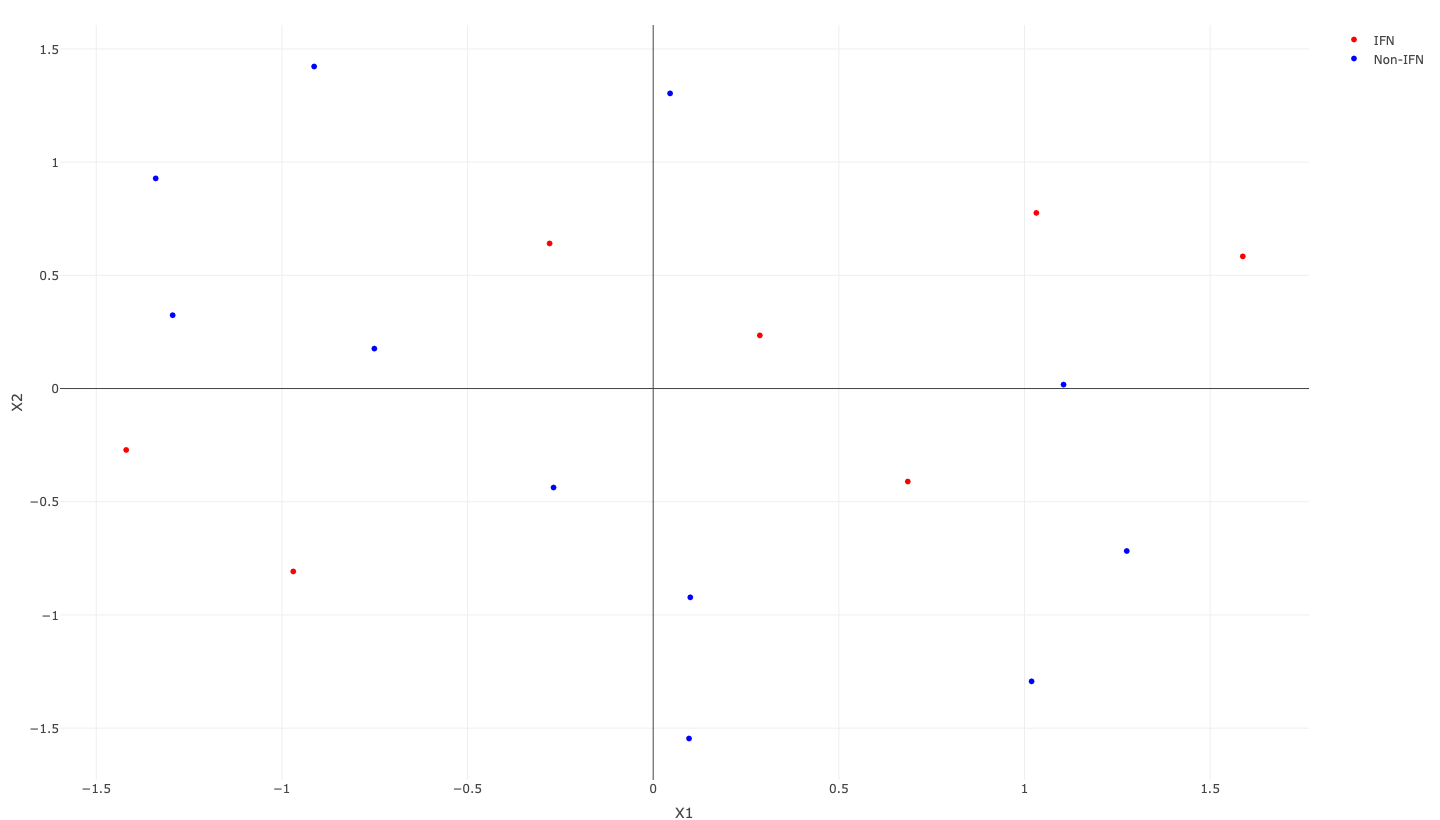

In [76]:
from PIL import Image
img = Image.open(r'IFN:non.png')
img

**Добавить по времени - когда воздействие интерферона было**  
**помещать контроли и лечения на общий umap - и смотреть как они отображаются**